In [3]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Visit the Mars Temperature data site and scrape data 
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

In [5]:
#Assemble the scraped data into a Pandas DataFrame
mars_weather_df = df[0]
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
#Examine the data types of all the DataFrame columns
mars_weather_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
#convert terrestrial_date column to datetime datatype
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'], format='%Y-%m-%d')

In [8]:
#Reexamine the data types of all the DataFrame columns
mars_weather_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [9]:
#How many months exist on Mars?
mars_weather_df.groupby("month").count()

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,174,174,174,174,174,174
2,178,178,178,178,178,178
3,192,192,192,192,192,192
4,194,194,194,194,194,194
5,149,149,149,149,149,149
6,147,147,147,147,147,147
7,142,142,142,142,142,142
8,141,141,141,141,141,141
9,134,134,134,134,134,134


In [10]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
# We will use the groupby function to group the dataset by the martian days (sol) and apply count function on this data
mars_weather_df.groupby("sol").count()

,id,terrestrial_date,ls,month,min_temp,pressure
sol,,,,,,
10,1,1,1,1,1,1
11,1,1,1,1,1,1
12,1,1,1,1,1,1
13,1,1,1,1,1,1
14,1,1,1,1,1,1
...,...,...,...,...,...,...
1973,1,1,1,1,1,1
1974,1,1,1,1,1,1
1975,1,1,1,1,1,1


In [11]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
len(mars_weather_df.groupby("sol"))
#Solution: 1867 Martian days worth of data exist in the scraped dataset

1867

In [84]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)
temp_df = mars_weather_df.groupby("month").mean()[['min_temp']].sort_values(by=['min_temp'])
temp_df

,min_temp
month,
3,-83.307292
4,-82.747423
2,-79.932584
5,-79.308725
1,-77.160920
6,-75.299320
12,-74.451807
7,-72.281690
11,-71.985507


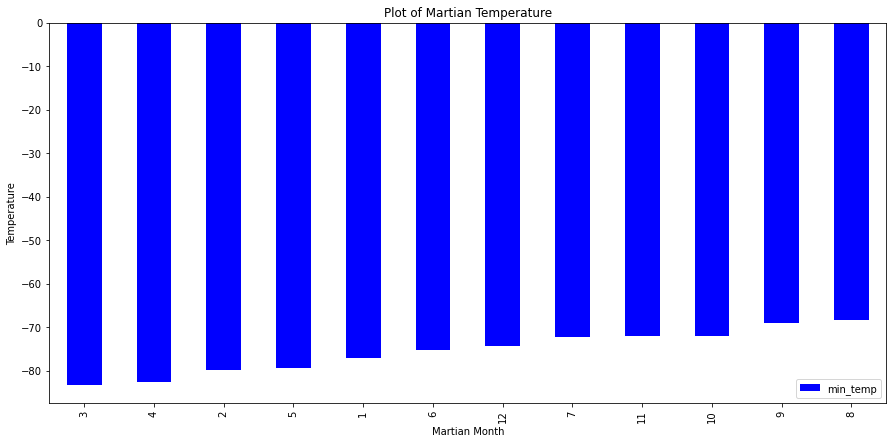

In [85]:
# Create a bar chart based off of the group series from before
temp_df_bar = temp_df.plot(kind='bar',figsize =(15,7), color = "b", title ="Plot of Martian Temperature")

# Set the xlabel and ylabel using class methods
temp_df_bar.set_xlabel("Martian Month")
temp_df_bar.set_ylabel("Temperature")

plt.show()

In [ ]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)
# Solution: Month 3 is the coldest month while Month 8 is the warmest month on Mars

In [79]:
#Which months have the lowest and the highest atmospheric pressure on Mars?
pressure_df = mars_weather_df.groupby("month").mean()[['pressure']].sort_values(by=['pressure'])
pressure_df

,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


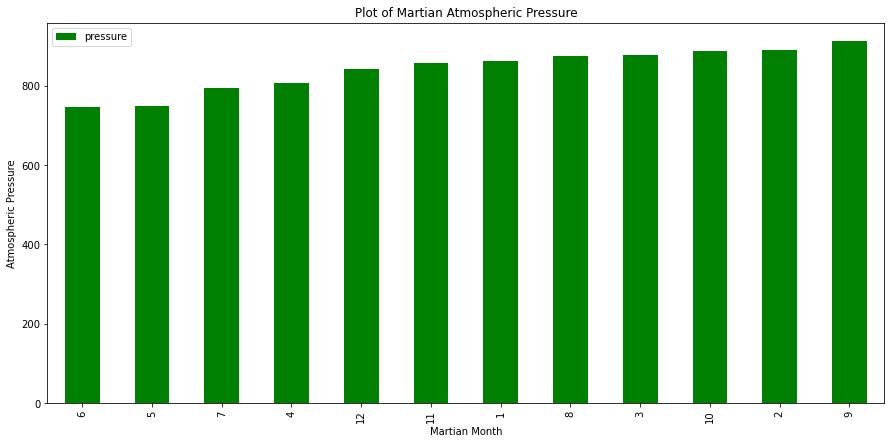

In [82]:
# Create a bar chart based off of the group series from before
pressure_df_bar = pressure_df.plot(kind='bar',figsize =(15,7), color = "g", title ="Plot of Martian Atmospheric Pressure")

# Set the xlabel and ylabel using class methods
pressure_df_bar.set_xlabel("Martian Month")
pressure_df_bar.set_ylabel("Atmospheric Pressure")

plt.show()

In [ ]:
#Which months have the lowest and the highest atmospheric pressure on Mars?
#Solution: Month 6 has the lowest atmospheric pressure while month 9 has the highest atmospheric pressure on Mars

Text(0, 0.5, 'Temperature')

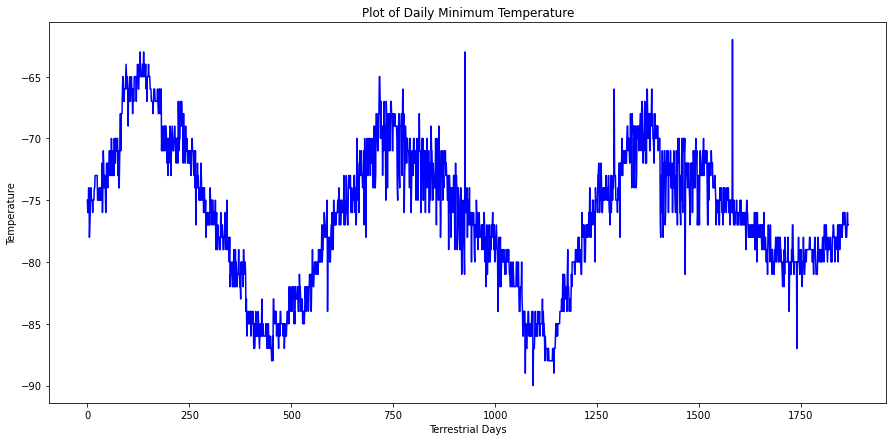

In [17]:
# How many terrestrial (Earth) days exist in a Martian year? 
daily_mintemp = mars_weather_df['min_temp'].plot(kind='line',figsize =(15,7), color = "b", title ="Plot of Daily Minimum Temperature")

# Set the xlabel and ylabel using class methods
daily_mintemp.set_xlabel("Terrestrial Days")
daily_mintemp.set_ylabel("Temperature")

In [16]:
#From the above plot the peak values can be used to calculate the number of days in a terrestrial year
peak_value_one = 730
peak_value_two = 1375
Number_of_days = (peak_value_two - peak_value_one)
print(Number_of_days)

645


In [117]:
# Set the output file name
output_data_file = "Mars_Weather.csv"

# Export the DataFrame into a CSV file
mars_weather_df.to_csv(output_data_file)